In [1]:
from google.colab import files
uploaded = files.upload()
import csv
import matplotlib.pyplot as plt
x = []
y = []

file_name = list(uploaded.keys())[0]

with open(file_name, "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        x.append(float(row["SquareFootage"]))
        y.append(float(row["Price"]))
#cost funtion J(Thetha)
def compute_cost(x, y, m, c):
    n = len(x)
    return sum((m * x[i] + c - y[i])**2 for i in range(n)) / (2*n)
#BATCH GRADIENT DESCENT
def batch_gradient_descent(x, y, lr=1e-8, epochs=300000):
    m, c = 0.0, 0.0
    n = len(x)
    cost_history = []

    for _ in range(epochs):
        y_pred = [m*xi + c for xi in x]

        dm = sum((y_pred[i] - y[i]) * x[i] for i in range(n)) / n
        dc = sum((y_pred[i] - y[i]) for i in range(n)) / n

        m -= lr * dm
        c -= lr * dc

        cost_history.append(compute_cost(x, y, m, c))

    return m, c, cost_history
# STOCHASTIC GRADIENT DESCENT
def stochastic_gradient_descent(x, y, lr=1e-8, epochs=300000):
    m, c = 0.0, 0.0
    n = len(x)
    cost_history = []

    for _ in range(epochs):
        for i in range(n):
            pred = m*x[i] + c
            err = pred - y[i]
            m -= lr * err * x[i]
            c -= lr * err

        cost_history.append(compute_cost(x, y, m, c))
    return m, c, cost_history



Saving housing_prices - housing_prices.csv to housing_prices - housing_prices (9).csv


**Find m and c(weights) using BGD and SGD**

In [2]:

m_bgd, c_bgd, cost_bgd = batch_gradient_descent(x, y)
m_sgd, c_sgd, cost_sgd = stochastic_gradient_descent(x, y)
print(m_bgd,c_bgd)
print(m_sgd,c_sgd)


171.86942285035215 0.4343827250825677
171.80281182412804 8.86593652188763


Convergence plot


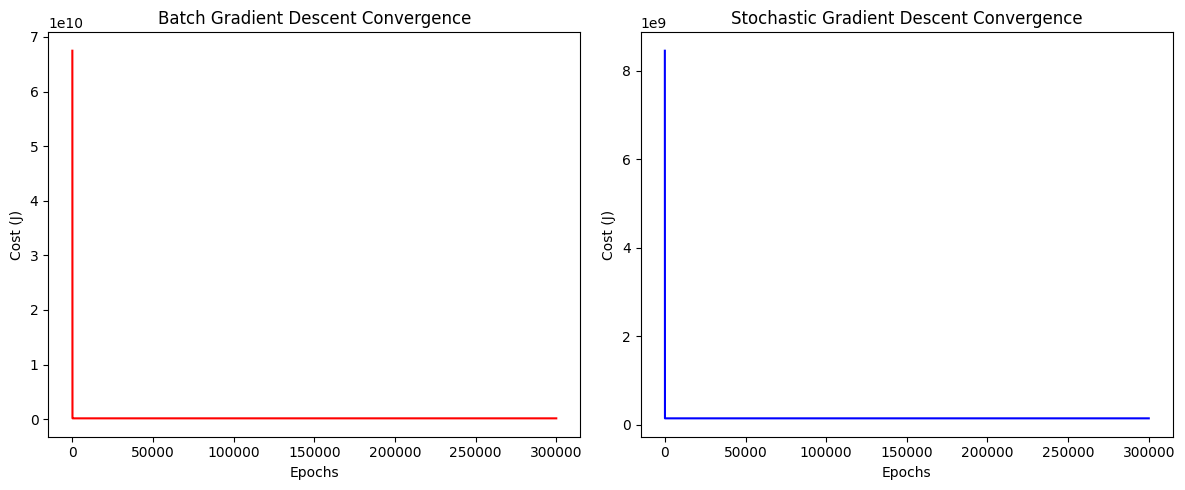

In [3]:


plt.figure(figsize=(12,5))

# Batch GD convergence
plt.subplot(1,2,1)
plt.plot(cost_bgd, color='red')
plt.title("Batch Gradient Descent Convergence")
plt.xlabel("Epochs")
plt.ylabel("Cost (J)")

# Stochastic GD convergence
plt.subplot(1,2,2)
plt.plot(cost_sgd, color='blue')
plt.title("Stochastic Gradient Descent Convergence")
plt.xlabel("Epochs")
plt.ylabel("Cost (J)")

plt.tight_layout()
plt.show()


Now we have predicted function y_pred=m(we have find)*x+c

output the predicted price for a house with 2,500 square feet(x=2500)

In [4]:
pred_bgd = m_bgd * 2500 + c_bgd
pred_sgd = m_sgd * 2500 + c_sgd

print("\n Predicted Price for 2500 sq ft:")
print(f"BGD Prediction: RS. {pred_bgd:.2f}")
print(f"SGD Prediction: Rs. {pred_sgd:.2f}")


 Predicted Price for 2500 sq ft:
BGD Prediction: RS. 429673.99
SGD Prediction: Rs. 429515.90


Best Fit Line

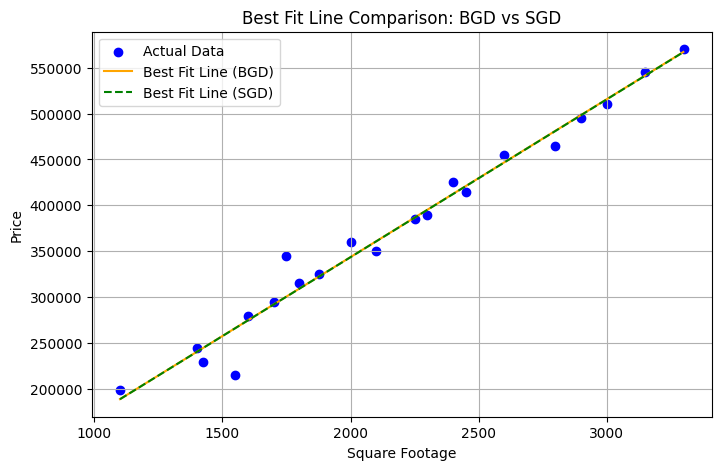

In [5]:


plt.figure(figsize=(8, 5))

# Actual Data
plt.scatter(x, y, color="blue", label="Actual Data")

# Line for BGD
x_line = list(range(int(min(x)), int(max(x))))
y_line_bgd = [m_bgd * xi + c_bgd for xi in x_line]
plt.plot(x_line, y_line_bgd, color="orange", label="Best Fit Line (BGD)")

# Line for SGD
y_line_sgd = [m_sgd * xi + c_sgd for xi in x_line]
plt.plot(x_line, y_line_sgd, color="green", linestyle="--", label="Best Fit Line (SGD)")

plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Best Fit Line Comparison: BGD vs SGD")
plt.legend()
plt.grid(True)
plt.show()


By Importing libraries(basically check the difference)

Saving housing_prices - housing_prices.csv to housing_prices - housing_prices (12).csv
LINEAR REGRESSION (USING LIBRARIES)
Slope (m): 171.17327329376175
Intercept (c): 1627.3680380251608

 Predicted Price for 2500 sq ft: 429560.55

 Evaluation Metrics
MSE: 286142042.21
RMSE: 16915.73
R² Score: 0.9745


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


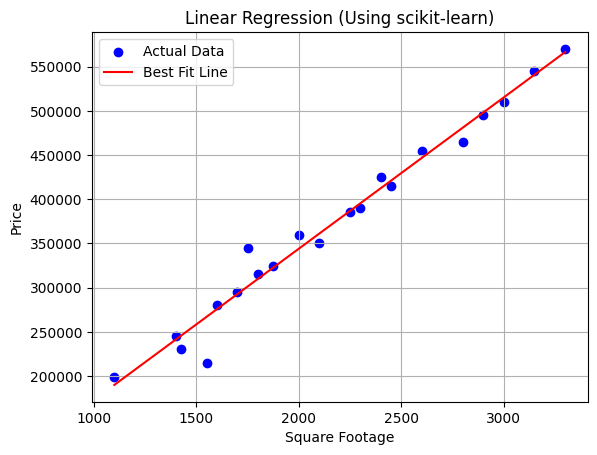

In [15]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

X = df[['SquareFootage']]
y = df['Price']

#  Linear Regression Model
model = LinearRegression()
model.fit(X, y)

m = model.coef_[0]     # slope
c = model.intercept_    # intercept

print("LINEAR REGRESSION (USING LIBRARIES)")
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

# Predictions
pred_2500 = model.predict([[2500]])[0]
print(f"\n Predicted Price for 2500 sq ft: {pred_2500:.2f}")

# Evaluation

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("\n Evaluation Metrics")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot Best Fit Line
plt.scatter(df['SquareFootage'], df['Price'], color='blue', label="Actual Data")
plt.plot(df['SquareFootage'], y_pred, color='red', label="Best Fit Line")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Linear Regression (Using scikit-learn)")
plt.legend()
plt.grid(True)
plt.show()


There is a difference in intercept value(c).now by using 2 different lr (lr for m and lr for c)

In [7]:
from google.colab import files
uploaded = files.upload()
import csv
import matplotlib.pyplot as plt
x = []
y = []

file_name = list(uploaded.keys())[0]

with open(file_name, "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        x.append(float(row["SquareFootage"]))
        y.append(float(row["Price"]))
#cost funtion J(Thetha)
def compute_cost(x, y, m, c):
    n = len(x)
    return sum((m * x[i] + c - y[i])**2 for i in range(n)) / (2*n)
#BATCH GRADIENT DESCENT
def batch_gradient_descent_2(x, y, lr_m=1e-8,lr_c=1e-4, epochs=30000):
    m, c = 0.0, 0.0
    n = len(x)
    cost_history = []

    for _ in range(epochs):
        y_pred = [m*xi + c for xi in x]

        dm = sum((y_pred[i] - y[i]) * x[i] for i in range(n)) / n
        dc = sum((y_pred[i] - y[i]) for i in range(n)) / n

        m -= lr_m * dm
        c -= lr_c * dc

        cost_history.append(compute_cost(x, y, m, c))

    return m, c, cost_history
# STOCHASTIC GRADIENT DESCENT
def stochastic_gradient_descent_2(x, y, lr_m=1e-8,lr_c=1e-5, epochs=300000):
    m, c = 0.0, 0.0
    n = len(x)
    cost_history = []

    for _ in range(epochs):
        for i in range(n):
            pred = m*x[i] + c
            err = pred - y[i]
            m -= lr_m * err * x[i]
            c -= lr_c * err

        cost_history.append(compute_cost(x, y, m, c))
    return m, c, cost_history



Saving housing_prices - housing_prices.csv to housing_prices - housing_prices (11).csv


In [12]:
m_bgd_2, c_bgd_2, cost_bgd_2 = batch_gradient_descent_2(x, y)
m_sgd_2, c_sgd_2, cost_sgd_2 = stochastic_gradient_descent_2(x, y)
print(m_bgd_2,c_bgd_2)
print(m_sgd_2,c_sgd_2)

171.47961322970278 911.5418945529208
171.0732495603393 1861.2877402705806


In [13]:
pred_bgd_2 = m_bgd_2 * 2500 + c_bgd_2
pred_sgd_2 = m_sgd_2 * 2500 + c_sgd_2

print("\n Predicted Price for 2500 sq ft:")
print(f"BGD Prediction: RS. {pred_bgd_2:.2f}")
print(f"SGD Prediction: Rs. {pred_sgd_2:.2f}")


 Predicted Price for 2500 sq ft:
BGD Prediction: RS. 429610.57
SGD Prediction: Rs. 429544.41


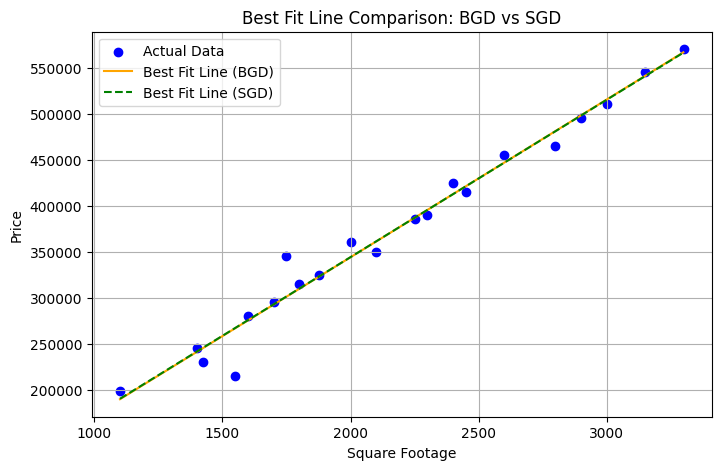

In [14]:


plt.figure(figsize=(8, 5))

# Actual Data
plt.scatter(x, y, color="blue", label="Actual Data")

# Line for BGD
x_line = list(range(int(min(x)), int(max(x))))
y_line_bgd = [m_bgd_2 * xi + c_bgd_2 for xi in x_line]
plt.plot(x_line, y_line_bgd, color="orange", label="Best Fit Line (BGD)")

# Line for SGD
y_line_sgd = [m_sgd_2 * xi + c_sgd_2 for xi in x_line]
plt.plot(x_line, y_line_sgd, color="green", linestyle="--", label="Best Fit Line (SGD)")

plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Best Fit Line Comparison: BGD vs SGD")
plt.legend()
plt.grid(True)
plt.show()
